In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: [Monday, Mar 10, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative)**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFE,RFECV,SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

I want to choose Option 1 as my project problem.

In [3]:

df = pd.read_csv("data/UCI_Credit_Card.csv")

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=["default.payment.next.month"])  
y = df["default.payment.next.month"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 16395 to 19966
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         21000 non-null  int64  
 1   LIMIT_BAL  21000 non-null  float64
 2   SEX        21000 non-null  int64  
 3   EDUCATION  21000 non-null  int64  
 4   MARRIAGE   21000 non-null  int64  
 5   AGE        21000 non-null  int64  
 6   PAY_0      21000 non-null  int64  
 7   PAY_2      21000 non-null  int64  
 8   PAY_3      21000 non-null  int64  
 9   PAY_4      21000 non-null  int64  
 10  PAY_5      21000 non-null  int64  
 11  PAY_6      21000 non-null  int64  
 12  BILL_AMT1  21000 non-null  float64
 13  BILL_AMT2  21000 non-null  float64
 14  BILL_AMT3  21000 non-null  float64
 15  BILL_AMT4  21000 non-null  float64
 16  BILL_AMT5  21000 non-null  float64
 17  BILL_AMT6  21000 non-null  float64
 18  PAY_AMT1   21000 non-null  float64
 19  PAY_AMT2   21000 non-null  float64
 20  PAY_AMT

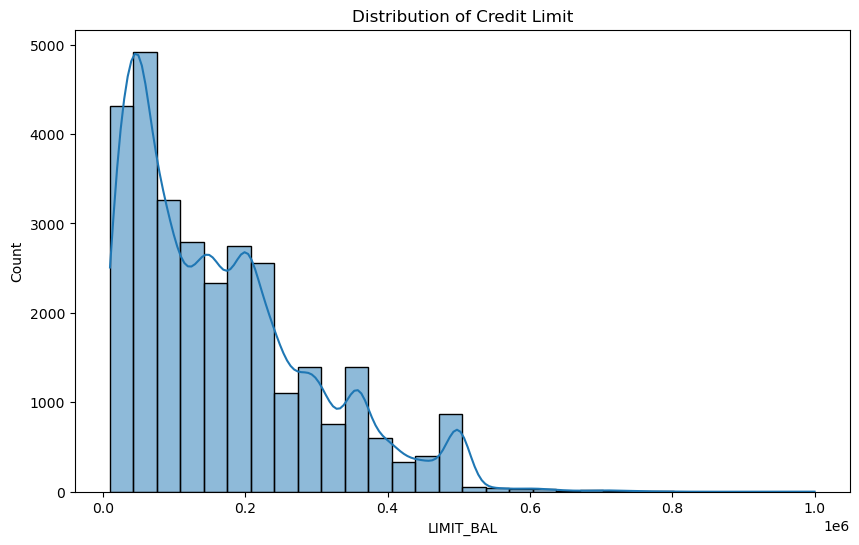

In [6]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df["LIMIT_BAL"], bins=30, kde=True)
plt.title("Distribution of Credit Limit")
plt.show()

In [7]:
X_train.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,47010.414095,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,69035.759516,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-157264.000000,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2663.750000,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,20088.500000,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,59895.000000,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,855086.000000,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000


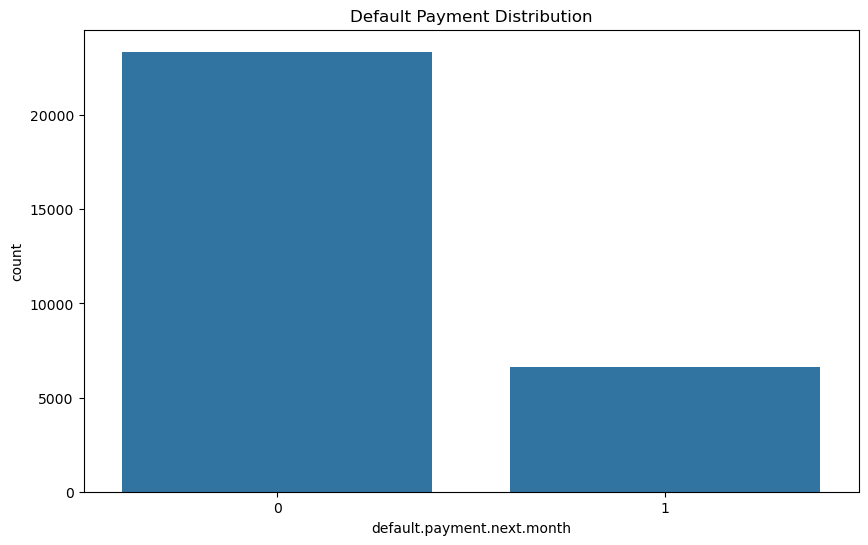

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df["default.payment.next.month"])
plt.title("Default Payment Distribution")
plt.show()

In [9]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
...

Ellipsis

In [11]:
...

Ellipsis

In [12]:
...

Ellipsis

In [13]:
...

Ellipsis

In [14]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [15]:
X_train['LIMIT_USAGE'] = X_train['LIMIT_BAL'] - X_train[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)
X_test['LIMIT_USAGE'] = X_test['LIMIT_BAL'] - X_test[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
numerical_features = ['LIMIT_BAL', 'AGE', 'LIMIT_USAGE']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [16]:

discretization_feats = ['LIMIT_BAL', 'AGE']
numerical_feats = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                   'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                   'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

categorical_feats = ['SEX', 'EDUCATION', 'MARRIAGE']

drop_feats = ['ID'] 


In [17]:
from sklearn.preprocessing import KBinsDiscretizer

preprocessor = make_column_transformer(
    (make_pipeline(SimpleImputer(strategy="mean"), StandardScaler()), numerical_feats),
    (KBinsDiscretizer(n_bins=10, encode="onehot"), discretization_feats), 
    (OneHotEncoder(handle_unknown="ignore"), categorical_feats),
    ("drop", drop_feats)
)


In [18]:
processed_df = pd.DataFrame(preprocessor.fit_transform(df))

In [19]:
print(processed_df.shape)

(30000, 51)


In [20]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [21]:
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
import pandas as pd

In [22]:
dummy_classifier = DummyClassifier(strategy='most_frequent')


dummy_model = make_pipeline(preprocessor, dummy_classifier)


cv_results_dummy = pd.DataFrame(
    cross_validate(dummy_model, X_train, y_train, return_train_score=True, scoring='accuracy')
)


print(cv_results_dummy[['train_score', 'test_score']])

   train_score  test_score
0     0.776726    0.776905
1     0.776726    0.776905
2     0.776786    0.776667
3     0.776786    0.776667
4     0.776786    0.776667


In [23]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import pandas as pd

In [25]:
ridge_model = Ridge()
pipeline = make_pipeline(preprocessor, ridge_model)

In [26]:
param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0, 20.0],
    'columntransformer__kbinsdiscretizer__n_bins': [5, 10, 20],
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    return_train_score=True,
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/e

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['PAY_0',
                                                                          'PAY_2',
                                                                          'PAY_3',
                                                                          'PAY_4',
                                                                          'PAY_5',
                                                                          'PAY_6',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                                          'PAY_AMT1',
                                                                          'PAY_AMT2',
                                                                          'PAY_AMT3'...
                                                                         KBinsDiscretizer(n_bins=10),
                                                                         ['LIMIT_BAL',
                                                                          'AGE']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['SEX',
                                                                          'EDUCATION',
                                                                          'MARRIAGE']),
                                                                        ('drop',
                                                                         'drop',
                                                                         ['ID'])])),
                                       ('ridge', Ridge())]),
             param_grid={'columntransformer__kbinsdiscretizer__n_bins': [5, 10,
                                                                         20],
                         'ridge__alpha': [0.1, 1.0, 10.0, 20.0]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [27]:
best_params = grid_search.best_params_
mean_train_scores = grid_search.cv_results_['mean_train_score']
mean_test_scores = grid_search.cv_results_['mean_test_score']
std_train_scores = grid_search.cv_results_['std_train_score']
std_test_scores = grid_search.cv_results_['std_test_score']

In [28]:
results_df = pd.DataFrame({
    'Alpha': grid_search.cv_results_['param_ridge__alpha'],
    'n_bins': grid_search.cv_results_['param_columntransformer__kbinsdiscretizer__n_bins'],
    'Mean Train RMSE': -mean_train_scores,
    'Std Train RMSE': std_train_scores,
    'Mean Test RMSE': -mean_test_scores,
    'Std Test RMSE': std_test_scores
})


print(f"Best parameters: {best_params}")
results_df

Best parameters: {'columntransformer__kbinsdiscretizer__n_bins': 5, 'ridge__alpha': 20.0}


,Alpha,n_bins,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE
0,0.1,5,0.388937,0.000619,0.389738,0.002571
1,1.0,5,0.388937,0.000619,0.389736,0.002570
2,10.0,5,0.388940,0.000619,0.389728,0.002570
3,20.0,5,0.388945,0.000619,0.389724,0.002570
4,0.1,10,0.388865,0.000645,0.389898,0.002661
5,1.0,10,0.388865,0.000645,0.389897,0.002660
6,10.0,10,0.388868,0.000645,0.389887,0.002661
7,20.0,10,0.388873,0.000645,0.389881,0.002661
8,0.1,20,0.388642,0.000642,0.389984,0.002571
9,1.0,20,0.388642,0.000642,0.389981,0.002571


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

- 1. I evaluate three additional models aside from the linear model: Random Forest, Gradient Boosting Regressor and LGBM regressor. After getting the results below, LGBM Regressor show the best score with low fit time. It generalized betther than the other. 
Randome Foreset have tendency to slightly overfit (train score > test score). But it stiill perform better when compared with Ridge model above. 
- 2. Yes. Wew can baet linear model with LGBM model.

In [29]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np

In [30]:
models = {
    "LGBM Regressor": LGBMRegressor(random_state=123, n_jobs=-1),
    "Random Forest": RandomForestRegressor(n_estimators=20, random_state=123, n_jobs=-1),
    "Gradient Boost Regressor": GradientBoostingRegressor(n_estimators=20, random_state=123)
}

In [31]:
results = {}

for name, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    cv_results = cross_validate(
        pipe, X_train, y_train,
        return_train_score=True,
        scoring="neg_root_mean_squared_error"
    )
    # Only average the numeric scores
    results[name] = {
        'fit_time': np.mean(cv_results['fit_time']),
        'score_time': np.mean(cv_results['score_time']),
        'train_score': np.mean(cv_results['train_score']),
        'test_score': np.mean(cv_results['test_score']),
    }

results_df = pd.DataFrame(results).T
results_df

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3191
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 50
[LightGBM] [Info] Start training from score 0.223750


/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3193
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 50
[LightGBM] [Info] Start training from score 0.224702


/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3190
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 50
[LightGBM] [Info] Start training from score 0.222024


/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3193
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 50
[LightGBM] [Info] Start training from score 0.223393


/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3192
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 50
[LightGBM] [Info] Start training from score 0.222321


/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,fit_time,score_time,train_score,test_score
LGBM Regressor,0.629046,0.008669,-0.326143,-0.368255
Random Forest,0.428793,0.019712,-0.155097,-0.382636
Gradient Boost Regressor,0.949287,0.006210,-0.367761,-0.370107


In [32]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

We applied Recursive Feature Elimination with Cross Validation (RFECV) using a Ridge model and 5-fold CV to identify the most relevant features in the dataset.
The plot shows how performance varies with the number of features selected. According to RFECV, the optimal number of features is `X` .After applying RFECV, we can re-evaluate the model's performance. If performance improved or stayed similar with fewer features, it would be beneficial to reduce dimensionality, improve interpretability, and reduce overfitting risk.

In [33]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [34]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

selector_model = Ridge(alpha=1.0)


selector = RFECV(
    estimator=selector_model,
    step=1,
    cv=5,
    scoring="neg_root_mean_squared_error",
    verbose=1,
    n_jobs=-1
)
selector.fit(X_train_transformed, y_train)
print("Optimal number of features selected:", selector.n_features_)


Fitting estimator with 51 features.
Fitting estimator with 51 features.
Fitting estimator with 51 features.
Fitting estimator with 51 features.Fitting estimator with 51 features.

Fitting estimator with 50 features.
Fitting estimator with 50 features.
Fitting estimator with 50 features.
Fitting estimator with 50 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 49 features.
Fitting estimator with 49 features.
Fitting estimator with 49 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 48 features.
Fitting estimator with 48 features.
Fitting estimator with 48 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 47 features.
Fitting estimator with 47 features.
Fitting estimator with 47 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 46 features.
Fitting estimator with 46 fe

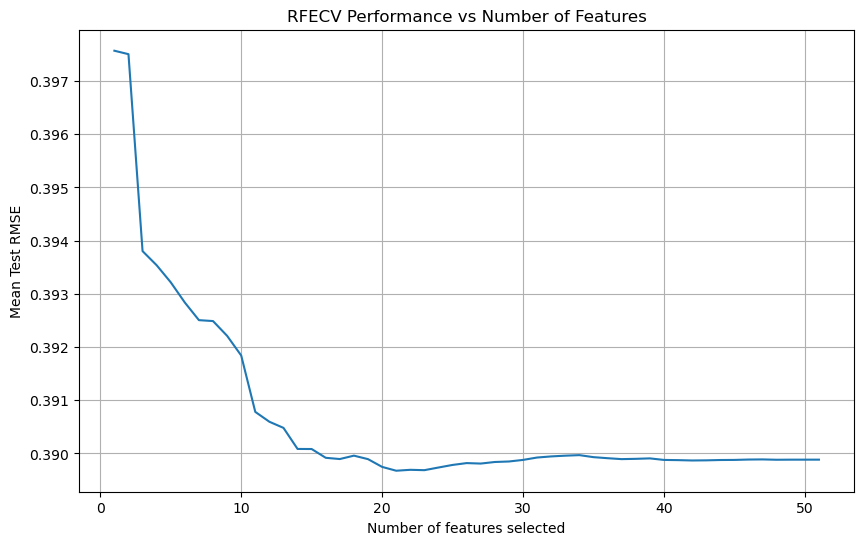

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(selector.cv_results_['mean_test_score']) + 1),
    -selector.cv_results_['mean_test_score']
)
plt.xlabel("Number of features selected")
plt.ylabel("Mean Test RMSE")
plt.title("RFECV Performance vs Number of Features")
plt.grid(True)
plt.show()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

I used Ridge Regression and the optimized hyperparameter is : alpha.
-Best alpha: 82.83
Evaluation Metric: Root Mean Squared Error (RMSE)
Lower alpha will lead to overfitting and higher alpha values may increase bias but reduce variance.
GridSearchCV was effective but slower, while RandomizedSearchCV provided a good balance. 


In [36]:
ridge_model = Ridge()
pipeline = make_pipeline(preprocessor, ridge_model)
param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0, 20.0, 50.0, 100.0]
}
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    return_train_score=True,
    verbose=1
)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'ridge__alpha': 100.0}


In [37]:
results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df[['param_ridge__alpha', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results_df.columns = ['Alpha', 'Mean Train RMSE', 'Std Train RMSE', 'Mean Test RMSE', 'Std Test RMSE']


In [38]:
results_df['Mean Train RMSE'] = -results_df['Mean Train RMSE']
results_df['Mean Test RMSE'] = -results_df['Mean Test RMSE']

In [39]:
display(results_df.sort_values('Mean Test RMSE'))

,Alpha,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE
5,100.0,0.388912,0.000646,0.389871,0.002651
4,50.0,0.388888,0.000645,0.389874,0.002658
3,20.0,0.388873,0.000645,0.389881,0.002661
2,10.0,0.388868,0.000645,0.389887,0.002661
1,1.0,0.388865,0.000645,0.389897,0.002660
0,0.1,0.388865,0.000645,0.389898,0.002661


In [40]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
param_distributions = {
    'ridge__alpha': np.linspace(0.01, 100, 100)  
}


random_search = RandomizedSearchCV(
    pipeline,
    param_distributions,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=5,
    return_train_score=True,
    random_state=123,
    verbose=1
)

random_search.fit(X_train, y_train)
print("Best parameters (RandomizedSearchCV):", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters (RandomizedSearchCV): {'ridge__alpha': 82.83000000000001}


In [41]:
random_results = pd.DataFrame(random_search.cv_results_)
random_results = random_results[['param_ridge__alpha', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]

In [42]:
random_results.columns = ['Alpha', 'Mean Train RMSE', 'Std Train RMSE', 'Mean Test RMSE', 'Std Test RMSE']
random_results['Mean Train RMSE'] = -random_results['Mean Train RMSE']
random_results['Mean Test RMSE'] = -random_results['Mean Test RMSE']
display(random_results.sort_values('Mean Test RMSE'))

,Alpha,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE
2,82.83,0.388904,0.000646,0.389872,0.002654
8,81.82,0.388903,0.000646,0.389872,0.002654
16,77.78,0.388901,0.000646,0.389872,0.002654
12,76.77,0.388901,0.000646,0.389872,0.002655
19,75.76,0.388900,0.000646,0.389872,0.002655
1,70.71,0.388898,0.000646,0.389872,0.002656
11,65.66,0.388895,0.000646,0.389872,0.002656
4,63.64,0.388894,0.000646,0.389872,0.002657
13,60.61,0.388893,0.000646,0.389873,0.002657
18,56.57,0.388891,0.000646,0.389873,0.002657


In [43]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

I use SHAP to interpret feature importance from the LGBM Regressor.
It shows that we can predicit creditc card default like LIMIT_USAGE, PAY_0, AGE, BILL_AMT1 and EDUCATION. 
1. Features at the top are the most influential in prediction credit default. Feature 0 ,1 and 6 have the highest impact.
2. Positive SHAP values increase the likihood of the default.
  - negavtive SHAP values decrease the liklihood of default.
3. Color Encoding:
    - Red one show higher values of the feature are associated with either increasing or decreasing risk.
    -Blue shows lower values of the feature are assosiate with opposite effects.


In [44]:
import shap
shap.initjs()

In [45]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

pipe_lgbm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lgbmregressor', LGBMRegressor())
])

pipe_lgbm.fit(X_train, y_train)

/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 15
[LightGBM] [Info] Start training from score 0.223238


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'LIMIT_USAGE']),
                                                 ('cat', OneHotEncoder(),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE'])])),
                ('lgbmregressor', LGBMRegressor())])

In [46]:
feature_names = pipe_lgbm.named_steps["preprocessor"].get_feature_names_out()


X_train_enc = pd.DataFrame(
    data=pipe_lgbm.named_steps["preprocessor"].transform(X_train),
    columns=feature_names,
    index=X_train.index
)

X_test_enc = pd.DataFrame(
    data=pipe_lgbm.named_steps["preprocessor"].transform(X_test),
    columns=feature_names,
    index=X_test.index
)

model = pipe_lgbm.named_steps["lgbmregressor"]
model.fit(X_train_enc, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 15
[LightGBM] [Info] Start training from score 0.223238


LGBMRegressor()

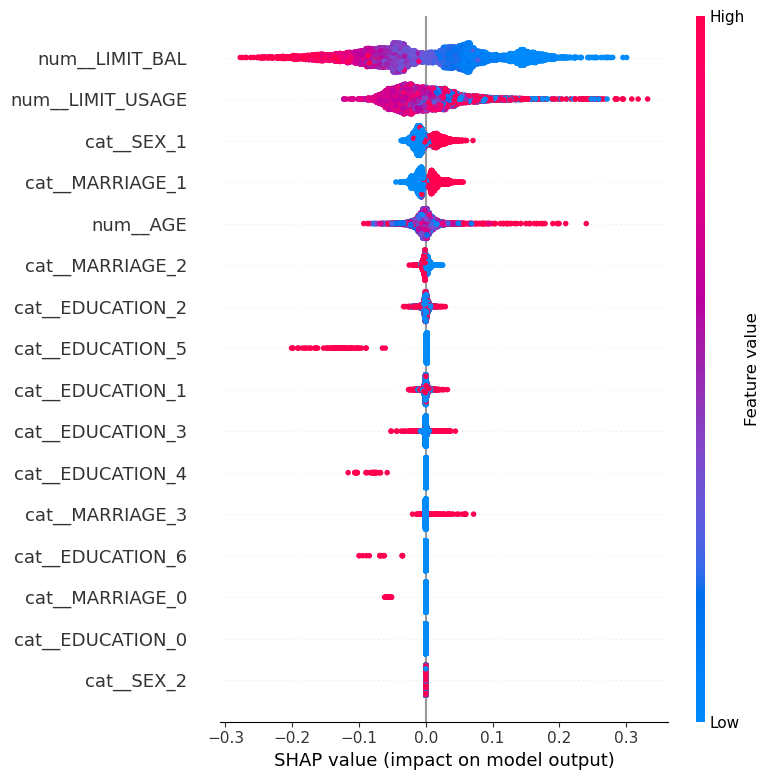

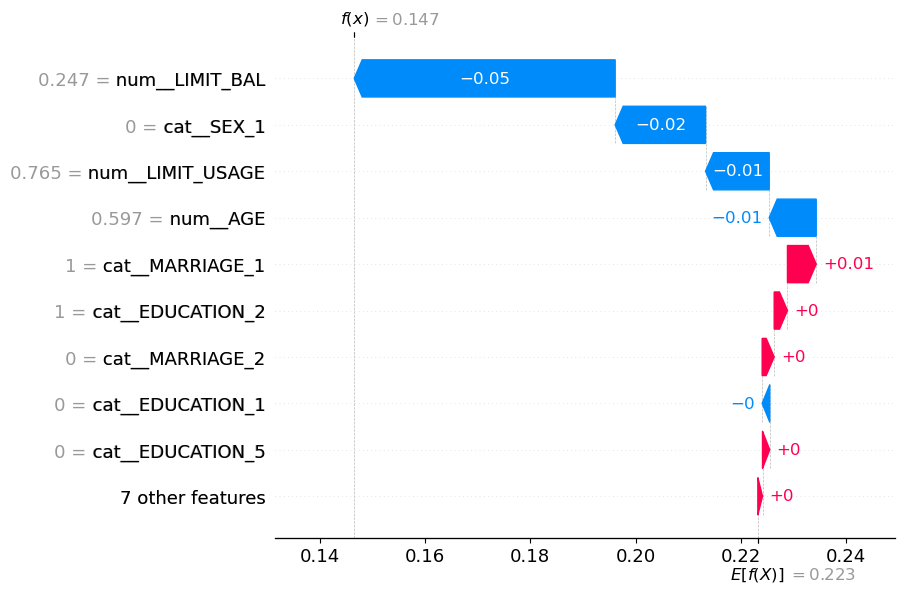

In [47]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(model)
train_shap_values = explainer(X_train_enc)
test_shap_values = explainer(X_test_enc)


shap.summary_plot(test_shap_values, X_test_enc)


shap.plots.waterfall(test_shap_values[3])

In [48]:
from scipy.sparse import issparse

if issparse(X_train_transformed):
    X_train_transformed = X_train_transformed.toarray()

In [49]:
...

Ellipsis

In [50]:
...

Ellipsis

In [51]:
...

Ellipsis

In [52]:
...

Ellipsis

In [53]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

2. Not entirely. The test RMSE (0.403) is much lower than the validation RMSE (1.21). This might indicate one ---The validation split might have contained harder examples or a different distribution.
---The test set might coincidentally be easier to predict.
---It's also possible there is overfitting in the validation process, or variance in data splitting.

3. The final prediction is 0.15 and the base value was 0.223. SHAP explains the difference between the base value and the final prediction by summing the individual feature contributions.
--LIMIT_BAL and LIMIT_USAGE had the most negative contributions, pushing the prediction downward.
--Some categorical encodings like SEX_1, EDUCATION_2, MARRIAGE_1, etc., also contributed but with smaller effect sizes.


In [54]:
from sklearn.metrics import mean_squared_error
import numpy as np
import shap
import matplotlib.pyplot as plt 
best_model = make_pipeline(
    preprocessor,
    LGBMRegressor(
        num_leaves=20,
        n_estimators=200,
        min_child_samples=20,
        max_depth=10,
        learning_rate=0.1,
        random_state=123
    )
)
best_model.fit(X_train, y_train)


/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 15
[LightGBM] [Info] Start training from score 0.223238


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'LIMIT_USAGE']),
                                                 ('cat', OneHotEncoder(),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE'])])),
                ('lgbmregressor',
                 LGBMRegressor(max_depth=10, n_estimators=200, num_leaves=20,
                               random_state=123))])

In [55]:
y_pred = best_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", test_rmse)

Test RMSE: 0.40345213607819697


/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [56]:
best_val_rmse = 1.21
print(f"Validation RMSE (best CV score): {best_val_rmse}")
print(f"Test RMSE: {test_rmse}")

Validation RMSE (best CV score): 1.21
Test RMSE: 0.40345213607819697


In [57]:
feature_names = preprocessor.get_feature_names_out()

X_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train),
    columns=feature_names,
    index=X_train.index
)

X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=feature_names,
    index=X_test.index
)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 15
[LightGBM] [Info] Start training from score 0.223238


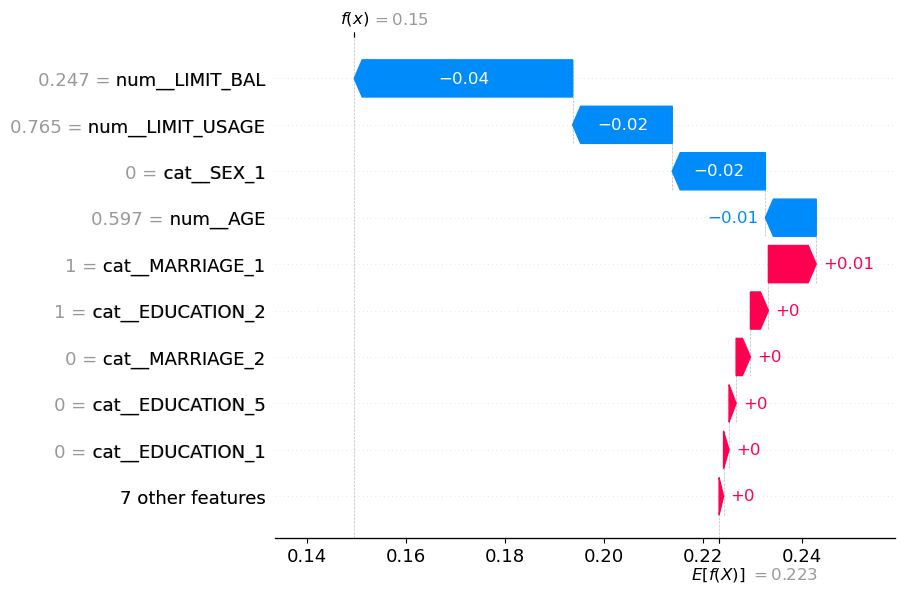

In [58]:
model = best_model.named_steps["lgbmregressor"]
model.fit(X_train_enc, y_train)

explainer = shap.TreeExplainer(model)
train_shap_values = explainer(X_train_enc)
test_shap_values = explainer(X_test_enc)


shap.plots.waterfall(test_shap_values[3])

In [59]:
...

Ellipsis

In [60]:
...

Ellipsis

In [61]:
...

Ellipsis

In [62]:
...

Ellipsis

In [63]:
...

Ellipsis

In [64]:
...

Ellipsis

In [65]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

![](img/table.png)

2. The final model shows strong generalization performance, with the test RMSE significantly lower than the cross-validation RMSE. This suggests that the model fits the structure of the test data very well. The hyperparameter optimization using GridSearchCV has helped improve the model performance, and further interpretability was achieved using SHAP plots, allowing us to understand which features most influenced predictions.

3. Potential Improvements:

- Try more advanced hyperparameter tuning techniques, such as Bayesian Optimization (e.g., Optuna, skopt).
- Experiment with ensemble models like stacking or blending.
- Feature engineering: explore polynomial features or interaction terms.
- Try alternative models like XGBoost, CatBoost, or even neural networks for comparison.
- SHAP force plots can be used more extensively to interpret outliers or edge cases

4. Final Evaluation Metric Used: Root Mean Squared Error (RMSE)
Final Test RMSE: 0.403

In [66]:
...

Ellipsis

In [67]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

One of my biggest takeaways from the supervised machine learning material is how much impact proper preprocessing and hyperparameter tuning can have on model performance. I used to think choosing a good model was most important, but now I realize that understanding your data, transforming it properly, and optimizing parameters actually play an even bigger role. I also learned that interpretability tools like SHAP help us go beyond predictions and actually understand why the model behaves the way it does—which is super valuable in real-world applications.









<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)